In [1]:
from pathlib import Path
DATASET_DIR = Path(r"C:\Users\kshit\Downloads\prject\archive\working\dataset_publish\balanced_pest_dataset")
print("DATASET_DIR exists:", DATASET_DIR.exists())
print("Resolved path:", DATASET_DIR.resolve() if DATASET_DIR.exists() else "NOT FOUND")


DATASET_DIR exists: True
Resolved path: C:\Users\kshit\Downloads\prject\archive\working\dataset_publish\balanced_pest_dataset


In [7]:
%matplotlib inline

In [6]:
!pip install tqdm

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [2]:
from pathlib import Path
if not DATASET_DIR.exists():
    raise SystemExit(f"Path not found: {DATASET_DIR}")

tops = sorted([p.name for p in DATASET_DIR.iterdir()])
print("Top-level files/folders:", tops)

# show common expected subfolders
expected = ["train","valid","val","test","images","labels"]
for e in expected:
    print(f"Contains '{e}'?:", (DATASET_DIR / e).exists())

# sample a few paths (up to 30)
img_exts = {'.jpg','.jpeg','.png','.bmp','.tif'}
all_files = [p for p in DATASET_DIR.rglob("*") if p.suffix.lower() in img_exts]
print("\nTotal images under dataset (recursively):", len(all_files))
print("\nSample image paths (relative):")
for p in all_files[:30]:
    print(" -", p.relative_to(DATASET_DIR))


Top-level files/folders: ['test', 'train', 'val']
Contains 'train'?: True
Contains 'valid'?: False
Contains 'val'?: True
Contains 'test'?: True
Contains 'images'?: False
Contains 'labels'?: False

Total images under dataset (recursively): 34200

Sample image paths (relative):
 - test\Adristyrannus\0_64060.jpg
 - test\Adristyrannus\10_64128.jpg
 - test\Adristyrannus\11_64142.jpg
 - test\Adristyrannus\12_64235.jpg
 - test\Adristyrannus\13_64079.jpg
 - test\Adristyrannus\14_64076.jpg
 - test\Adristyrannus\15_64016.jpg
 - test\Adristyrannus\16_64122.jpg
 - test\Adristyrannus\17_64239.jpg
 - test\Adristyrannus\18_64126.jpg
 - test\Adristyrannus\19_64245.jpg
 - test\Adristyrannus\1_64285.jpg
 - test\Adristyrannus\20_64252.jpg
 - test\Adristyrannus\21_64095.jpg
 - test\Adristyrannus\22_64136.jpg
 - test\Adristyrannus\23_64103.jpg
 - test\Adristyrannus\24_64163.jpg
 - test\Adristyrannus\25_64234.jpg
 - test\Adristyrannus\26_64153.jpg
 - test\Adristyrannus\27_64161.jpg
 - test\Adristyrannus\28_

In [3]:
# SAMPLE IMAGES FOR ANNOTATION
from pathlib import Path
import random, shutil
random.seed(0)

DATASET = Path(r"C:\Users\kshit\Downloads\prject\archive\working\dataset_publish\balanced_pest_dataset")
OUT = Path("C:\\Users\\kshit\\Downloads\\prject\\data\\annotation_sample")
NUM_PER_CLASS = 30   # -> 30 * #classes (16) = 480 images; increase to 50 for ~800

if OUT.exists():
    print("Removing old sample folder...")
    shutil.rmtree(OUT)
OUT.mkdir(parents=True, exist_ok=True)

classes = sorted([p.name for p in (DATASET/"train").iterdir() if p.is_dir()])
print("Found classes:", len(classes), classes[:10])

sampled = 0
for cls in classes:
    src_dir = DATASET/"train"/cls
    imgs = [p for p in src_dir.iterdir() if p.suffix.lower() in (".jpg",".jpeg",".png")]
    pick = imgs if len(imgs)<=NUM_PER_CLASS else random.sample(imgs, NUM_PER_CLASS)
    dest_dir = OUT/cls
    dest_dir.mkdir(parents=True, exist_ok=True)
    for p in pick:
        shutil.copy2(p, dest_dir/p.name)
    sampled += len(pick)
print(f"Sampled {sampled} images into {OUT.resolve()}")
# Show a few example paths
for i, p in enumerate(sorted(list(OUT.rglob("*.*"))[:50])):
    print(i+1, p.relative_to(OUT))


Removing old sample folder...
Found classes: 19 ['Adristyrannus', 'Aphids', 'Beetle', 'Bugs', 'Cabbage Looper', 'Cicadellidae', 'Cutworm', 'Earwig', 'FieldCricket', 'Grasshopper']
Sampled 570 images into C:\Users\kshit\Downloads\prject\data\annotation_sample
1 Adristyrannus\aug_1071.jpg
2 Adristyrannus\aug_1133.jpg
3 Adristyrannus\aug_1172.jpg
4 Adristyrannus\aug_118.jpg
5 Adristyrannus\aug_1254.jpg
6 Adristyrannus\aug_1255.jpg
7 Adristyrannus\aug_1268.jpg
8 Adristyrannus\aug_168.jpg
9 Adristyrannus\aug_227.jpg
10 Adristyrannus\aug_242.jpg
11 Adristyrannus\aug_285.jpg
12 Adristyrannus\aug_324.jpg
13 Adristyrannus\aug_337.jpg
14 Adristyrannus\aug_374.jpg
15 Adristyrannus\aug_425.jpg
16 Adristyrannus\aug_475.jpg
17 Adristyrannus\aug_511.jpg
18 Adristyrannus\aug_540.jpg
19 Adristyrannus\aug_635.jpg
20 Adristyrannus\aug_644.jpg
21 Adristyrannus\aug_661.jpg
22 Adristyrannus\aug_696.jpg
23 Adristyrannus\aug_708.jpg
24 Adristyrannus\aug_747.jpg
25 Adristyrannus\aug_840.jpg
26 Adristyrannus\au

In [4]:
# create classes.txt for LabelImg
from pathlib import Path
SAMPLED = Path("C:\\Users\\kshit\\Downloads\\prject\\data\\annotation_sample")
classes = sorted([p.name for p in (SAMPLED).iterdir() if p.is_dir()])
print("Writing classes (count):", len(classes))
print(classes)
# write classes.txt
cls_file = SAMPLED / "classes.txt"
cls_file.write_text("\n".join(classes))
print("Wrote", cls_file.resolve())


Writing classes (count): 19
['Adristyrannus', 'Aphids', 'Beetle', 'Bugs', 'Cabbage Looper', 'Cicadellidae', 'Cutworm', 'Earwig', 'FieldCricket', 'Grasshopper', 'Mediterranean fruit fly', 'Mites', 'RedSpider', 'Riptortus', 'Slug', 'Snail', 'Thrips', 'Weevil', 'Whitefly']
Wrote C:\Users\kshit\Downloads\prject\data\annotation_sample\classes.txt


In [7]:
# AUTO LABEL using simple threshold + biggest contour (robust, no contrib needed)
from pathlib import Path
import cv2, numpy as np
from tqdm.notebook import tqdm

BASE_PATH = Path(r"C:\Users\kshit\Downloads\prject\archive\working\dataset_publish\balanced_pest_dataset")
OUT_LABELS_ROOT = Path("data/auto_labels_simple")

# Build class index mapping
classes = sorted([p.name for p in (BASE_PATH/"train").iterdir() if p.is_dir()])
class_to_idx = {c:i for i,c in enumerate(classes)}

print("Classes:", len(classes))
print(classes)

OUT_LABELS_ROOT.mkdir(parents=True, exist_ok=True)

def get_biggest_contour_bbox(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # adaptive threshold (handles varying lighting)
    th = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY_INV, 41, 5)
    # morphology to clean up
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    th = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel,2)
    
    # find contours
    cnts,_ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not cnts:
        return None
    
    # pick largest contour by area
    cnt = max(cnts, key=cv2.contourArea)
    x,y,w,h = cv2.boundingRect(cnt)
    return x,y,w,h

count_images = 0
count_labeled = 0

for split in ["train","val","test"]:
    split_dir = BASE_PATH / split
    if not split_dir.exists():
        continue
    
    for cls in tqdm(sorted([p.name for p in split_dir.iterdir() if p.is_dir()]), desc=f"Processing {split}"):
        cls_idx = class_to_idx[cls]
        
        for imgp in (split_dir/cls).glob("*.*"):
            if imgp.suffix.lower() not in [".jpg",".jpeg",".png",".bmp",".tif"]:
                continue
            
            count_images += 1
            
            img = cv2.imread(str(imgp))
            if img is None:
                continue
            
            bbox = get_biggest_contour_bbox(img)
            
            # Mirror output folder structure
            rel = imgp.relative_to(BASE_PATH)
            label_dest = OUT_LABELS_ROOT / rel.parent / (imgp.stem + ".txt")
            label_dest.parent.mkdir(parents=True, exist_ok=True)
            
            if bbox:
                x,y,wbox,hbox = bbox
                h_im,w_im = img.shape[:2]
                
                # convert to YOLO normalized cx,cy,w,h
                xc = (x + wbox/2) / w_im
                yc = (y + hbox/2) / h_im
                wr = wbox / w_im
                hr = hbox / h_im
                
                label_dest.write_text(f"{cls_idx} {xc:.6f} {yc:.6f} {wr:.6f} {hr:.6f}\n")
                count_labeled += 1
            else:
                label_dest.write_text("")  # empty label

print(f"Done! Total images: {count_images}, Labeled with box: {count_labeled}")
print("Labels saved in:", OUT_LABELS_ROOT.resolve())


Classes: 19
['Adristyrannus', 'Aphids', 'Beetle', 'Bugs', 'Cabbage Looper', 'Cicadellidae', 'Cutworm', 'Earwig', 'FieldCricket', 'Grasshopper', 'Mediterranean fruit fly', 'Mites', 'RedSpider', 'Riptortus', 'Slug', 'Snail', 'Thrips', 'Weevil', 'Whitefly']


Processing train:   0%|          | 0/19 [00:00<?, ?it/s]

Processing val:   0%|          | 0/19 [00:00<?, ?it/s]

Processing test:   0%|          | 0/19 [00:00<?, ?it/s]

Done! Total images: 34200, Labeled with box: 34200
Labels saved in: C:\Users\kshit\Downloads\prject\data\auto_labels_simple


In [10]:
# Build YOLO dataset from auto labels
from pathlib import Path
import shutil, yaml

# Adjust these if different
BASE_PATH = Path(r"C:\Users\kshit\Downloads\prject\archive\working\dataset_publish\balanced_pest_dataset")
AUTO_LABEL_ROOT = Path(r"C:\Users\kshit\Downloads\prject\data\auto_labels_simple")  # from your run
OUT = Path("data/det_auto")

# Clean old
if OUT.exists():
    shutil.rmtree(OUT)
for s in ["train","val","test"]:
    (OUT/s/"images").mkdir(parents=True, exist_ok=True)
    (OUT/s/"labels").mkdir(parents=True, exist_ok=True)

# copy images & labels (mirror structure)
total_imgs = 0
total_labels = 0
for split in ["train","val","test"]:
    split_dir = BASE_PATH / split
    if not split_dir.exists():
        continue
    for cls in sorted([p.name for p in split_dir.iterdir() if p.is_dir()]):
        for imgp in (split_dir/cls).glob("*.*"):
            if imgp.suffix.lower() not in [".jpg",".jpeg",".png",".bmp",".tif"]:
                continue
            dst_img = OUT / split / "images" / imgp.name
            shutil.copy2(imgp, dst_img)
            label_src = AUTO_LABEL_ROOT / imgp.relative_to(BASE_PATH).parent / (imgp.stem + ".txt")
            dst_lbl = OUT / split / "labels" / (imgp.stem + ".txt")
            if label_src.exists():
                shutil.copy2(label_src, dst_lbl)
                total_labels += 1
            else:
                dst_lbl.write_text("")
            total_imgs += 1

# create data.yaml
classes = sorted([p.name for p in (BASE_PATH/"train").iterdir() if p.is_dir()])
data_yaml = OUT / "data.yaml"
content = {
    "train": str((OUT/"train").resolve()),
    "val":   str((OUT/"val").resolve()),
    "test":  str((OUT/"test").resolve()),
    "nc": len(classes),
    "names": classes
}
data_yaml.write_text(yaml.dump(content))
print("Built:", OUT.resolve())
print("Train images:", len(list((OUT/"train"/"images").glob("*.*"))))
print("Val images:  ", len(list((OUT/"val"/"images").glob("*.*"))))
print("Test images: ", len(list((OUT/"test"/"images").glob("*.*"))))
print("Labels copied:", total_labels)
print("data.yaml written to:", data_yaml.resolve())


Built: C:\Users\kshit\Downloads\prject\data\det_auto
Train images: 3047
Val images:   2137
Test images:  2150
Labels copied: 34200
data.yaml written to: C:\Users\kshit\Downloads\prject\data\det_auto\data.yaml


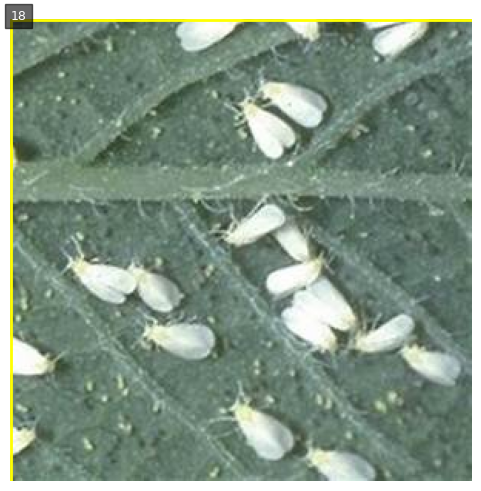

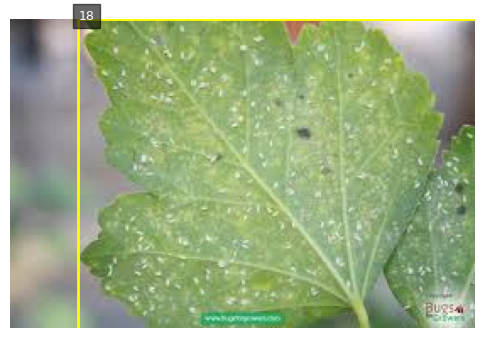

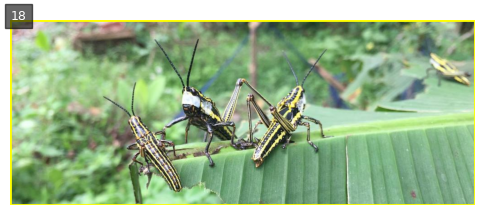

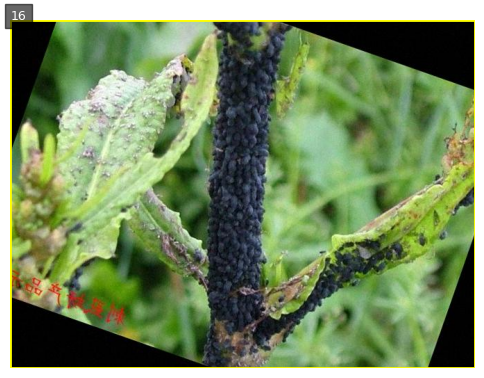

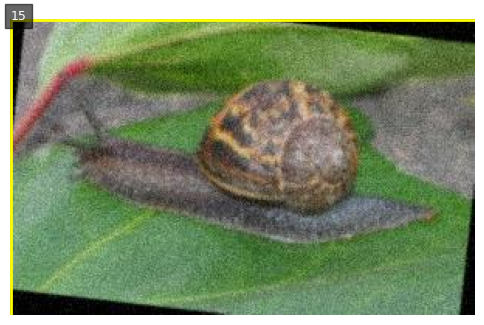

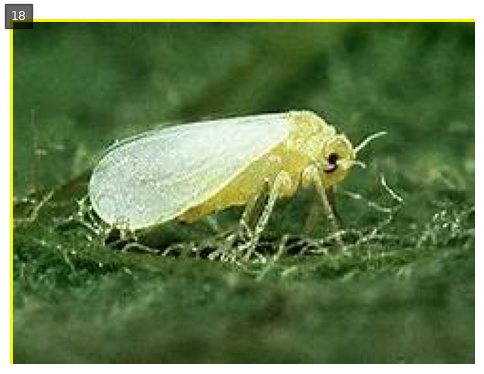

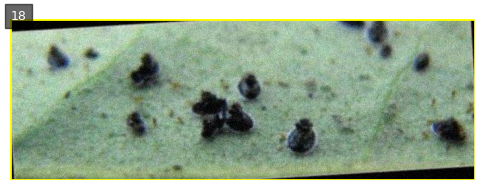

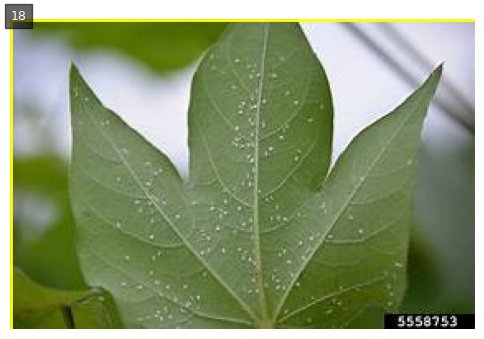

In [11]:
# Visual check of auto-labels
import random, cv2, matplotlib.pyplot as plt
from pathlib import Path
OUT = Path("data/det_auto")
names = (OUT/"data.yaml").read_text()  # we only need yaml for classes later if needed

def read_yolo_labels(txt_path, img_w, img_h):
    boxes = []
    for line in open(txt_path,'r',encoding='utf-8').read().splitlines():
        if not line.strip(): continue
        parts = line.split()
        cls = int(parts[0])
        xc, yc, w, h = map(float, parts[1:5])
        x1 = (xc - w/2) * img_w
        y1 = (yc - h/2) * img_h
        x2 = (xc + w/2) * img_w
        y2 = (yc + h/2) * img_h
        boxes.append((int(cls), x1, y1, x2, y2))
    return boxes

# collect some sample images from train
img_list = list((OUT/"train"/"images").glob("*.*"))
sample = random.sample(img_list, min(8, len(img_list)))
for p in sample:
    img = cv2.imread(str(p))
    h,w = img.shape[:2]
    lbl = (OUT/"train"/"labels"/(p.stem + ".txt"))
    boxes = read_yolo_labels(lbl, w, h) if lbl.exists() else []
    # convert BGR->RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,6))
    plt.imshow(img); plt.axis('off')
    ax = plt.gca()
    for cls,x1,y1,x2,y2 in boxes:
        rect = plt.Rectangle((x1,y1), x2-x1, y2-y1, fill=False, linewidth=2, color='yellow')
        ax.add_patch(rect)
        ax.text(x1, max(0,y1-6), str(cls), fontsize=9, color='white', bbox=dict(facecolor='black',alpha=0.6))
    plt.show()


In [1]:
# Smoke train on auto-labeled dataset
import pkgutil, subprocess, sys
def pip_install(pkg):
    subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])
if not pkgutil.find_loader("ultralytics"):
    print("Installing ultralytics...")
    pip_install("ultralytics")

from ultralytics import YOLO
from pathlib import Path
DATA_YAML = Path("data/det_auto/data.yaml")
assert DATA_YAML.exists(), "data/det_auto/data.yaml not found"

EPOCHS = 3   # small smoke test
IMGSZ = 640
BATCH = 16   # reduce to 8 or 4 if OOM or CPU

model = YOLO("yolov8n.pt")   # tiny model (fast)
print("Starting smoke training: epochs=", EPOCHS, "batch=", BATCH)
res = model.train(data=str(DATA_YAML), epochs=EPOCHS, imgsz=IMGSZ, batch=BATCH)
print("Training finished. Check runs/detect for results. Last run folder printed below:")

from pathlib import Path
exp_dirs = sorted(Path("runs/detect").glob("exp*"), key=lambda p: p.stat().st_mtime)
print("Recent runs (latest):", exp_dirs[-1] if exp_dirs else "No runs found")


C:\Users\kshit\AppData\Local\Temp\ipykernel_12652\2416068515.py:5: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
  if not pkgutil.find_loader("ultralytics"):


Starting smoke training: epochs= 3 batch= 16
Ultralytics 8.3.228  Python-3.12.0 torch-2.9.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data\det_auto\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tru

In [1]:
# Identify corrupt or unsupported images and optionally move them to backup
from pathlib import Path
from PIL import Image, UnidentifiedImageError
import shutil

DATA_ROOT = Path("C:/Users/kshit/Downloads/prject/data/det_auto")  # dataset you trained on
bad = []
for p in list((DATA_ROOT/"val"/"images").glob("*.*")) + list((DATA_ROOT/"train"/"images").glob("*.*")):
    try:
        img = Image.open(p)
        img.verify()
    except (UnidentifiedImageError, Exception) as e:
        bad.append((p, str(e)))

print("Found corrupt/unsupported images:", len(bad))
for i,(p,err) in enumerate(bad[:20],1):
    print(i, p.name, err)

# Move bad files to backup folder (uncomment to actually move)
if bad:
    bk = Path("corrupt_images_backup")
    bk.mkdir(exist_ok=True)
    for p,err in bad:
        target = bk / p.name
        shutil.move(str(p), str(target))
    print("Moved bad images to", bk.resolve())
else:
    print("No bad images found.")


Found corrupt/unsupported images: 0
No bad images found.


In [1]:
# PSEUDO-LABELING: generate predictions as YOLO .txt labels for all images
from ultralytics import YOLO
from pathlib import Path
import os
import numpy as np

WEIGHTS = Path("C:/Users/kshit/Downloads/prject/runs/detect/train2/weights/best.pt")
assert WEIGHTS.exists(), "best.pt not found at expected path"

MODEL = YOLO(str(WEIGHTS))
SRC_ROOT = Path(r"C:\Users\kshit\Downloads\prject\archive\working\dataset_publish\balanced_pest_dataset")
OUT_LABELS = Path("data/pseudo_labels")
OUT_LABELS.mkdir(parents=True, exist_ok=True)

CONF_THRESH = 0.35   # increase if you want higher-confidence boxes (0.4-0.6)
MAX_PER_IMAGE = 50

def save_yolo_txt(path, boxes):
    path.parent.mkdir(parents=True, exist_ok=True)
    with open(path, "w") as f:
        for cls, conf, x1,y1,x2,y2 in boxes:
            # convert xyxy -> xcenter ycenter w h (normalized)
            w_im = img_w
            h_im = img_h
            xc = ((x1+x2)/2)/w_im
            yc = ((y1+y2)/2)/h_im
            wr = (x2-x1)/w_im
            hr = (y2-y1)/h_im
            f.write(f"{int(cls)} {xc:.6f} {yc:.6f} {wr:.6f} {hr:.6f}\n")

total = 0
saved = 0
# iterate over splits and classes (mirror structure)
for split in ["train","val","test"]:
    for clsdir in (SRC_ROOT / split).iterdir():
        if not clsdir.is_dir(): continue
        for imgp in clsdir.glob("*.*"):
            if imgp.suffix.lower() not in [".jpg",".jpeg",".png",".bmp",".tif","tiff","webp"]: 
                continue
            total += 1
            # run inference
            res = MODEL.predict(source=str(imgp), imgsz=640, conf=CONF_THRESH, iou=0.45, max_det=MAX_PER_IMAGE, verbose=False)
            r = res[0]
            img_w, img_h = r.orig_shape[1], r.orig_shape[0]  # width, height
            boxes = []
            if hasattr(r, "boxes") and len(r.boxes) > 0:
                xyxy = r.boxes.xyxy.cpu().numpy()
                confs = r.boxes.conf.cpu().numpy()
                classes = r.boxes.cls.cpu().numpy().astype(int)
                for (x1,y1,x2,y2),cf,cc in zip(xyxy, confs, classes):
                    boxes.append((int(cc), float(cf), float(x1), float(y1), float(x2), float(y2)))
            # save predictions as label file
            rel = imgp.relative_to(SRC_ROOT)
            out_path = OUT_LABELS / rel.parent / (imgp.stem + ".txt")
            out_path.parent.mkdir(parents=True, exist_ok=True)
            if boxes:
                # write YOLO txt
                with open(out_path, "w") as f:
                    for cls,cf,x1,y1,x2,y2 in boxes:
                        xc = ((x1+x2)/2)/img_w
                        yc = ((y1+y2)/2)/img_h
                        wr = (x2-x1)/img_w
                        hr = (y2-y1)/img_h
                        f.write(f"{cls} {xc:.6f} {yc:.6f} {wr:.6f} {hr:.6f}\n")
                saved += 1
            else:
                out_path.write_text("")  # empty label

print("Pseudo-labeling done. Images processed:", total, "labels with detections:", saved)
print("Pseudo labels saved to:", OUT_LABELS.resolve())


Pseudo-labeling done. Images processed: 34200 labels with detections: 29838
Pseudo labels saved to: C:\Users\kshit\Downloads\prject\data\pseudo_labels


In [1]:
# Build data/det_pseudo from pseudo labels and retrain
import shutil, yaml
from pathlib import Path

SRC_ROOT = Path(r"C:\Users\kshit\Downloads\prject\archive\working\dataset_publish\balanced_pest_dataset")
PSEUDO = Path("data/pseudo_labels")
OUT = Path("data/det_pseudo")

if OUT.exists():
    shutil.rmtree(OUT)
for s in ["train","val","test"]:
    (OUT/s/"images").mkdir(parents=True, exist_ok=True)
    (OUT/s/"labels").mkdir(parents=True, exist_ok=True)

total_imgs = 0
for split in ["train","val","test"]:
    for clsdir in (SRC_ROOT / split).iterdir():
        if not clsdir.is_dir(): continue
        for imgp in clsdir.glob("*.*"):
            if imgp.suffix.lower() not in [".jpg",".jpeg",".png",".bmp",".tif","tiff","webp"]:
                continue
            dst_img = OUT / split / "images" / imgp.name
            shutil.copy2(imgp, dst_img)
            pseudo_lbl = PSEUDO / imgp.relative_to(SRC_ROOT).parent / (imgp.stem + ".txt")
            dst_lbl = OUT / split / "labels" / (imgp.stem + ".txt")
            if pseudo_lbl.exists():
                shutil.copy2(pseudo_lbl, dst_lbl)
            else:
                dst_lbl.write_text("")
            total_imgs += 1

# write data.yaml
classes = sorted([p.name for p in (SRC_ROOT/"train").iterdir() if p.is_dir()])
data_yaml = OUT / "data.yaml"
content = {"train": str((OUT/"train").resolve()), "val": str((OUT/"val").resolve()),
           "test": str((OUT/"test").resolve()), "nc": len(classes), "names": classes}
data_yaml.write_text(yaml.dump(content))
print("Built dataset at", OUT.resolve())
print("Total images copied:", total_imgs)
print("data.yaml:", data_yaml.resolve())

# Now train on this dataset: longer run
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
print("Starting longer training on pseudo-labeled dataset (epochs=30)")
res = model.train(data=str(data_yaml), epochs=30, imgsz=640, batch=8)  # adjust batch for your CPU/GPU
print("Retraining finished.")


Built dataset at C:\Users\kshit\Downloads\prject\data\det_pseudo
Total images copied: 34200
data.yaml: C:\Users\kshit\Downloads\prject\data\det_pseudo\data.yaml
Starting longer training on pseudo-labeled dataset (epochs=30)
New https://pypi.org/project/ultralytics/8.3.230 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.228  Python-3.12.0 torch-2.9.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data\det_pseudo\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=F

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



      21/30         0G     0.1414     0.5161     0.9455          6        640: 100% ━━━━━━━━━━━━ 381/381 3.4s/it 21:18<1.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 134/134 1.8s/it 3:581.0ss
                   all       2135       2488      0.653      0.564      0.503      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      22/30         0G     0.1266       0.47     0.9378          6        640: 100% ━━━━━━━━━━━━ 381/381 2.0s/it 12:57<1.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 134/134 243.9s/it 9:04:481ss
                   all       2135       2488      0.648      0.605      0.516      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      23/30         0G     0.1216     0.4177     0.9324          7        640: 100% ━━━━━━━━━━━━ 381/381 8.0s/it 50:58<1.9s
                 Clas

In [2]:
from ultralytics import YOLO
from pathlib import Path
import cv2, matplotlib.pyplot as plt
import random

BEST_WEIGHTS = Path(r"C:\Users\kshit\Downloads\prject\runs\detect\train5\weights\best.pt")
assert BEST_WEIGHTS.exists(), f"best.pt not found at {BEST_WEIGHTS}"

model = YOLO(str(BEST_WEIGHTS))
print("Loaded model:", BEST_WEIGHTS)

TEST_DIR = Path(r"C:\Users\kshit\Downloads\prject\data\det_pseudo\test\images")
test_imgs = list(TEST_DIR.glob("*.*"))
print("Total test images:", len(test_imgs))

sample = random.sample(test_imgs, min(6, len(test_imgs)))
for img_path in sample:
    res = model.predict(source=str(img_path), imgsz=640, conf=0.35, verbose=False)
    r = res[0]
    im = r.plot()  # BGR
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(6,6))
    plt.title(img_path.name)
    plt.imshow(im)
    plt.axis("off")
    plt.show()


Loaded model: C:\Users\kshit\Downloads\prject\runs\detect\train5\weights\best.pt
Total test images: 2150


<Figure size 600x600 with 1 Axes>

<Figure size 600x600 with 1 Axes>

<Figure size 600x600 with 1 Axes>

<Figure size 600x600 with 1 Axes>

<Figure size 600x600 with 1 Axes>

<Figure size 600x600 with 1 Axes>

In [3]:
import cv2, matplotlib.pyplot as plt

def detect_pests(image_path, conf=0.4):
    """
    Takes an image path.
    Returns (annotated_image_array, detections_list).
    detections_list = [(class_name, confidence, [x1,y1,x2,y2]), ...]
    """
    res = model.predict(source=str(image_path), imgsz=640, conf=conf, verbose=False)
    r = res[0]
    names = model.names

    dets = []
    if hasattr(r, "boxes") and len(r.boxes) > 0:
        xyxy = r.boxes.xyxy.cpu().numpy()
        cls_ids = r.boxes.cls.cpu().numpy().astype(int)
        confs = r.boxes.conf.cpu().numpy()
        for (x1,y1,x2,y2), cid, cf in zip(xyxy, cls_ids, confs):
            dets.append((names[int(cid)], float(cf), [float(x1), float(y1), float(x2), float(y2)]))

    annotated = r.plot()
    annotated = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
    return annotated, dets

# example usage
test_image = test_imgs[0]
annotated, dets = detect_pests(test_image, conf=0.4)
print("Detections:")
for cname, cf, box in dets:
    print(f"{cname}: {cf:.2f}, box={box}")

plt.figure(figsize=(6,6))
plt.imshow(annotated)
plt.axis("off")
plt.show()


Detections:
Whitefly: 0.98, box=[0.0, 0.9672483801841736, 366.1259765625, 246.0]


<Figure size 600x600 with 1 Axes>

In [4]:
from collections import Counter

def summarize_pest_risk(detections):
    """
    detections: list of (class_name, confidence, [x1,y1,x2,y2])
    Returns a dict with counts and a human-readable summary string.
    """
    counts = Counter([cls for cls, cf, box in detections])

    def risk_from_count(c):
        if c == 0:
            return "No risk"
        elif c <= 3:
            return "Low"
        elif c <= 10:
            return "Medium"
        else:
            return "High"

    summary_lines = []
    for pest, c in counts.items():
        summary_lines.append(f"{pest}: {c} detections → {risk_from_count(c)} risk")

    if not summary_lines:
        summary_lines = ["No pests detected."]

    return counts, "\n".join(summary_lines)

# Example: run on one test image
annotated, dets = detect_pests(test_image, conf=0.4)

print("Raw detections:")
for cname, cf, box in dets:
    print(f"  {cname}: {cf:.2f}, box={box}")

counts, summary = summarize_pest_risk(dets)
print("\nPest risk summary:")
print(summary)

plt.figure(figsize=(6,6))
plt.imshow(annotated)
plt.axis("off")
plt.show()


Raw detections:
  Whitefly: 0.98, box=[0.0, 0.9672483801841736, 366.1259765625, 246.0]

Pest risk summary:
Whitefly: 1 detections → Low risk


<Figure size 600x600 with 1 Axes>

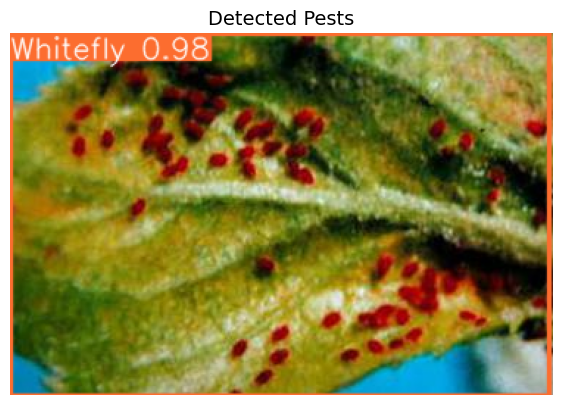

Pest Summary:
Whitefly: 1 detections → Low risk


In [9]:
annotated, dets = detect_pests(test_image, conf=0.4)
counts, summary = summarize_pest_risk(dets)

plt.figure(figsize=(7,7))
plt.imshow(annotated)
plt.axis("off")
plt.title("Detected Pests", fontsize=14)
plt.show()

print("Pest Summary:")
print(summary)
